<a href="https://colab.research.google.com/github/OMONa-E/Dangerous_Farm_Insects_Prediction_Using_CNNS/blob/main/Dangerous_Farm_Insect_Prediction_Augmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Author: OMONA Emmanuel



```
# Predicting Dangerous Farm Insects using Convolution Nueral Networks
```



**About Dataset**

**Description:**

The Dangerous Farm Insects Image Dataset is a curated collection of images featuring 15 different types of insects commonly found in agricultural settings. This dataset provides valuable visual resources for studying, identifying, and understanding the characteristics of these potentially harmful insects. Each insect is represented by multiple high-quality images, showcasing their distinct features, colors, and patterns.

Usefulness and Potential Applications:

1. ***Pest Identification and Management:***

  This dataset serves as a valuable resource for farmers, entomologists, and agricultural researchers involved in pest management. The images enable accurate identification of dangerous farm insects, allowing for timely and targeted pest control strategies.

2. ***Crop Protection and Yield Enhancement:***

  By recognizing and understanding the appearance of these harmful insects, farmers can implement preventive measures to protect their crops from infestations. The dataset aids in developing efficient pest control strategies, reducing the risk of crop damage and improving overall yield.

3. ***Education and Awareness:***
  
  The dataset can be utilized in educational settings to teach students about the importance of insect identification, the impact of harmful insects on agriculture, and the significance of integrated pest management practices. It promotes awareness among farmers, students, and the general public regarding the threats posed by these insects and the importance of sustainable farming practices.

4. ***Machine Learning and Computer Vision:***
  
  The dataset can be utilized for training and evaluating computer vision models and machine learning algorithms. Researchers and data scientists can leverage this dataset to develop automated systems for insect recognition, classification, and early detection of infestations.

5. ***Research and Analysis:***
  
  The dataset provides a valuable resource for conducting research and analysis on the behaviour, distribution, and ecological impact of dangerous farm insects. It facilitates studies on the effectiveness of various control methods and the development of innovative solutions for sustainable agriculture.

With its diverse collection of high-quality images and its potential applications in pest management, crop protection, education, and research, the Dangerous Farm Insects Image Dataset is a valuable asset for anyone involved in the agricultural industry, entomology research, or computer vision applications in the field of farming.

**Keywords:**

farm insects, dangerous insects, pest management, crop protection, agriculture, entomology, integrated pest management, computer vision, machine learning, dataset.

***Dataset Source:*** [Kaggle](https://www.kaggle.com/datasets/tarundalal/dangerous-insects-dataset/data)

In [2]:
# imports
import numpy as np
import tensorflow as tf
# Set the seed for NumPy
np.random.seed(42)
# Set the seed for TensorFlow
tf.random.set_seed(42)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array, array_to_img, save_img, image_dataset_from_directory
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, RandomFlip, RandomRotation, RandomZoom, RandomCrop, RandomContrast, RandomBrightness
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay

In [3]:
# save our directory path in a variable
data_dir = '/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week20/Data/farm_insects'
data_dir

'/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week20/Data/farm_insects'

In [4]:
# we load the image dataset using image_dataset_from_directory
image_dataset = image_dataset_from_directory(
    data_dir,
    label_mode='categorical',
    image_size=(128, 128),
    batch_size=32,
    shuffle=True,
    seed=42
)

image_dataset

Found 1591 files belonging to 15 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>

In [5]:
# we determine dataset size
dataset_size = len(image_dataset)

dataset_size

50

In [6]:
# we extract our first batch and label
first_batch, first_labels = image_dataset.take(1).get_single_element() #and next(iter(image_dataset.take(1)))

print(type(first_batch), type(first_labels))

first_batch.shape, first_labels.shape

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


(TensorShape([32, 128, 128, 3]), TensorShape([32, 15]))

In [7]:
# we define our class names and number
image_class_names = image_dataset.class_names
image_class_num = len(image_class_names)

image_class_names, image_class_num

(['Africanized Honey Bees (Killer Bees)',
  'Aphids',
  'Armyworms',
  'Brown Marmorated Stink Bugs',
  'Cabbage Loopers',
  'Citrus Canker',
  'Colorado Potato Beetles',
  'Corn Borers',
  'Corn Earworms',
  'Fall Armyworms',
  'Fruit Flies',
  'Spider Mites',
  'Thrips',
  'Tomato Hornworms',
  'Western Corn Rootworms'],
 15)

In [8]:
# we define dictionary for our num,class as our key,value pair
image_num_to_class_dict = dict(enumerate(image_class_names)) #or {k: v for k,v in enumerate(image_class_names)} or dict(zip(range(image_class_num), image_class_names))

image_num_to_class_dict

{0: 'Africanized Honey Bees (Killer Bees)',
 1: 'Aphids',
 2: 'Armyworms',
 3: 'Brown Marmorated Stink Bugs',
 4: 'Cabbage Loopers',
 5: 'Citrus Canker',
 6: 'Colorado Potato Beetles',
 7: 'Corn Borers',
 8: 'Corn Earworms',
 9: 'Fall Armyworms',
 10: 'Fruit Flies',
 11: 'Spider Mites',
 12: 'Thrips',
 13: 'Tomato Hornworms',
 14: 'Western Corn Rootworms'}

In [9]:
# we define our input shape/dimension
input_shape = [*first_batch.shape[1:]] #or [*first_batch[0].shape]

input_shape

[128, 128, 3]

In [10]:
# we split our dataset magnitude into train, validation, test set
split_train = .7
split_val = .2
split_test = .1

train_set = int(dataset_size * split_train)
val_set = int(dataset_size * split_val)
test_set = int(dataset_size * split_test)

train_set, val_set, test_set

(35, 10, 5)

In [11]:
# we determine our train, validation, test datasets using take(), skip()
train_dataset = image_dataset.take(train_set)
val_dataset = image_dataset.skip(train_set).take(val_set)
test_dataset = image_dataset.skip(train_set + val_set).take(test_set)

len(train_dataset), len(val_dataset), len(test_dataset)

(35, 10, 5)

In [12]:
# we optimize our train, validation, test datasets before modeling with shuffle(), prefetch() and cache()
train_dataset = train_dataset.cache().shuffle(buffer_size=len(train_dataset)).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

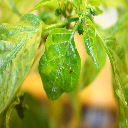

In [13]:
# display our first batch image as an image example
first_batch_img = first_batch[0]

array_to_img(first_batch_img)

In [14]:
# display our firt label as an image example
display(first_labels, image_num_to_class_dict[np.argmax(first_labels[0])])

<tf.Tensor: shape=(32, 15), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0

'Aphids'

In [16]:
# we augmentate the dataset
augmented_dataset = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(-0.2, 0.2),
    RandomContrast(0.2),
    RandomBrightness(0.2)
])

augmented_dataset

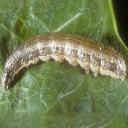

In [29]:
# orignal first image
array_to_img(first_batch[3])

In [32]:
first_batch[1].shape

TensorShape([128, 128, 3])

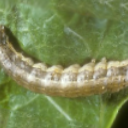

In [33]:
# augmented first image
array_to_img(augmented_dataset(first_batch[3]))

In [34]:
# we define our model build function
def model_build():
  # define the model
  model = Sequential([
      Rescaling(1./255, input_shape=input_shape),
      # we add augmented model
      augmented_dataset,
      Conv2D(filters=16, kernel_size=3, padding='same'),
      MaxPooling2D(pool_size=2),
      Conv2D(filters=32, kernel_size=3, padding='same'),
      MaxPooling2D(pool_size=2),
      Flatten(),
      Dense(units=image_class_num, activation='softmax')
  ])
  # compile the model
  model.compile(
      loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy']
  )
  # define our summary
  model.summary()

  return model

# we build our model
model = model_build()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                 

In [35]:
# we fit our model and save it in a varaible called history
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset
)

history

Epoch 1/10
35/35 [==============================] - 590s 4s/step - loss: 59.5877 - accuracy: 0.0616 - val_loss: 3.1524 - val_accuracy: 0.0500
Epoch 2/10
35/35 [==============================] - 1s 16ms/step - loss: 19.2358 - accuracy: 0.0777 - val_loss: 3.0527 - val_accuracy: 0.0688
Epoch 3/10
35/35 [==============================] - 0s 13ms/step - loss: 10.4456 - accuracy: 0.0786 - val_loss: 2.9992 - val_accuracy: 0.0875
Epoch 4/10
35/35 [==============================] - 0s 13ms/step - loss: 10.1716 - accuracy: 0.0759 - val_loss: 2.8654 - val_accuracy: 0.1156
Epoch 5/10
35/35 [==============================] - 1s 17ms/step - loss: 7.5159 - accuracy: 0.0723 - val_loss: 2.7585 - val_accuracy: 0.0875
Epoch 6/10
35/35 [==============================] - 1s 21ms/step - loss: 5.0063 - accuracy: 0.0759 - val_loss: 2.7094 - val_accuracy: 0.1031
Epoch 7/10
35/35 [==============================] - 1s 18ms/step - loss: 4.7369 - accuracy: 0.0670 - val_loss: 2.6981 - val_accuracy: 0.0875
Epoch 8/1

In [36]:
# @title Evaluation Custom Function
def get_true_pred_labels(model,ds):
    """Gets the labels and predicted probabilities from a Tensorflow model and Dataset object.
    Adapted from source: https://stackoverflow.com/questions/66386561/keras-classification-report-accuracy-is-different-between-model-predict-accurac
    """
    y_true = []
    y_pred_probs = []

    # Loop through the dataset as a numpy iterator
    for images, labels in ds.as_numpy_iterator():

        # Get prediction with batch_size=1
        y_probs = model.predict(images, batch_size=1, verbose=0)
        # Combine previous labels/preds with new labels/preds
        y_true.extend(labels)
        y_pred_probs.extend(y_probs)
    ## Convert the lists to arrays
    y_true = np.array(y_true)
    y_pred_probs = np.array(y_pred_probs)

    return y_true, y_pred_probs


def convert_y_to_sklearn_classes(y, verbose=False):
    # If already one-dimension
    if np.ndim(y)==1:
        if verbose:
            print("- y is 1D, using it as-is.")
        return y

    # If 2 dimensions with more than 1 column:
    elif y.shape[1]>1:
        if verbose:
            print("- y is 2D with >1 column. Using argmax for metrics.")
        return np.argmax(y, axis=1)

    else:
        if verbose:
            print("y is 2D with 1 column. Using round for metrics.")
        return np.round(y).flatten().astype(int)



def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False,values_format=".2f"):

    # Get the classification report
    report = classification_report(y_true, y_pred)

    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)

    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)

    # Create a confusion matrix  of raw counts (left subplot)
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=None,
                                            cmap='gist_gray_r',# Updated cmap
                                            values_format="d",
                                            colorbar=colorbar,
                                            ax = axes[0]);
    axes[0].set_title("Raw Counts")


    # Create a confusion matrix with the data with normalize argument
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=normalize,
                                            cmap=cmap,
                                            values_format=values_format, #New arg
                                            colorbar=colorbar,
                                            ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")

    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()

    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict



## PLOT_HISTORY FUNCTION FROM WEEK 3
def plot_history(history,figsize=(6,8)):
    # Get a unique list of metrics
    all_metrics = np.unique([k.replace('val_','') for k in history.history.keys()])

    # Plot each metric
    n_plots = len(all_metrics)
    fig, axes = plt.subplots(nrows=n_plots, figsize=figsize)
    axes = axes.flatten()

    # Loop through metric names add get an index for the axes
    for i, metric in enumerate(all_metrics):

        # Get the epochs and metric values
        epochs = history.epoch
        score = history.history[metric]

        # Plot the training results
        axes[i].plot(epochs, score, label=metric, marker='.')
        # Plot val results (if they exist)
        try:
            val_score = history.history[f"val_{metric}"]
            axes[i].plot(epochs, val_score, label=f"val_{metric}",marker='.')
        except:
            pass

        finally:
            axes[i].legend()
            axes[i].set(title=metric, xlabel="Epoch",ylabel=metric)

    # Adjust subplots and show
    fig.tight_layout()
    plt.show();
    return fig, axes


def evaluate_classification_network(model,
                                    X_train=None, y_train=None,
                                    X_test=None, y_test=None,
                                    history=None, history_figsize=(6,6),
                                    figsize=(6,4), normalize='true',
                                    output_dict = False,
                                    cmap_train='Blues',
                                    cmap_test="Reds",
                                    values_format=".2f",
                                    colorbar=False):
    """Evaluates a neural network classification task using either
    separate X and y arrays or a tensorflow Dataset

    Data Args:
        X_train (array, or Dataset)
        y_train (array, or None if using a Dataset
        X_test (array, or Dataset)
        y_test (array, or None if using a Dataset)
        history (history object)
        """
    # Plot history, if provided
    if history is not None:
        plot_history(history, figsize=history_figsize)
    ## Adding a Print Header
    print("\n"+'='*80)
    print('- Evaluating Network...')
    print('='*80)
    ## TRAINING DATA EVALUATION
    # check if X_train was provided
    if X_train is not None:
        ## Check if X_train is a dataset
        if hasattr(X_train,'map'):
            # If it IS a Datset:
            # extract y_train and y_train_pred with helper function
            y_train, y_train_pred = get_true_pred_labels(model, X_train)
        else:
            # Get predictions for training data
            y_train_pred = model.predict(X_train)
        ## Pass both y-vars through helper compatibility function
        y_train = convert_y_to_sklearn_classes(y_train)
        y_train_pred = convert_y_to_sklearn_classes(y_train_pred)

        # Call the helper function to obtain regression metrics for training data
        results_train = classification_metrics(y_train, y_train_pred,
                                         output_dict=True, figsize=figsize,
                                             colorbar=colorbar, cmap=cmap_train,
                                               values_format=values_format,
                                         label='Training Data')

        ## Run model.evaluate
        print("\n- Evaluating Training Data:")
        print(model.evaluate(X_train, return_dict=True))

    # If no X_train, then save empty list for results_train
    else:
        results_train = []
    ## TEST DATA EVALUATION
    # check if X_test was provided
    if X_test is not None:
        ## Check if X_train is a dataset
        if hasattr(X_test,'map'):
            # If it IS a Datset:
            # extract y_train and y_train_pred with helper function
            y_test, y_test_pred = get_true_pred_labels(model, X_test)
        else:
            # Get predictions for training data
            y_test_pred = model.predict(X_test)
        ## Pass both y-vars through helper compatibility function
        y_test = convert_y_to_sklearn_classes(y_test)
        y_test_pred = convert_y_to_sklearn_classes(y_test_pred)

        # Call the helper function to obtain regression metrics for training data
        results_test = classification_metrics(y_test, y_test_pred,
                                         output_dict=True, figsize=figsize,
                                             colorbar=colorbar, cmap=cmap_test,
                                              values_format=values_format,
                                         label='Test Data')

        ## Run model.evaluate
        print("\n- Evaluating Test Data:")
        print(model.evaluate(X_test, return_dict=True))

    # If no X_test, then save empty list for results_test
    else:
        results_test = []

    # Store results in a dictionary
    results_dict = {'train':results_train,
                    'test': results_test}
    if output_dict == True:
        return results_dict

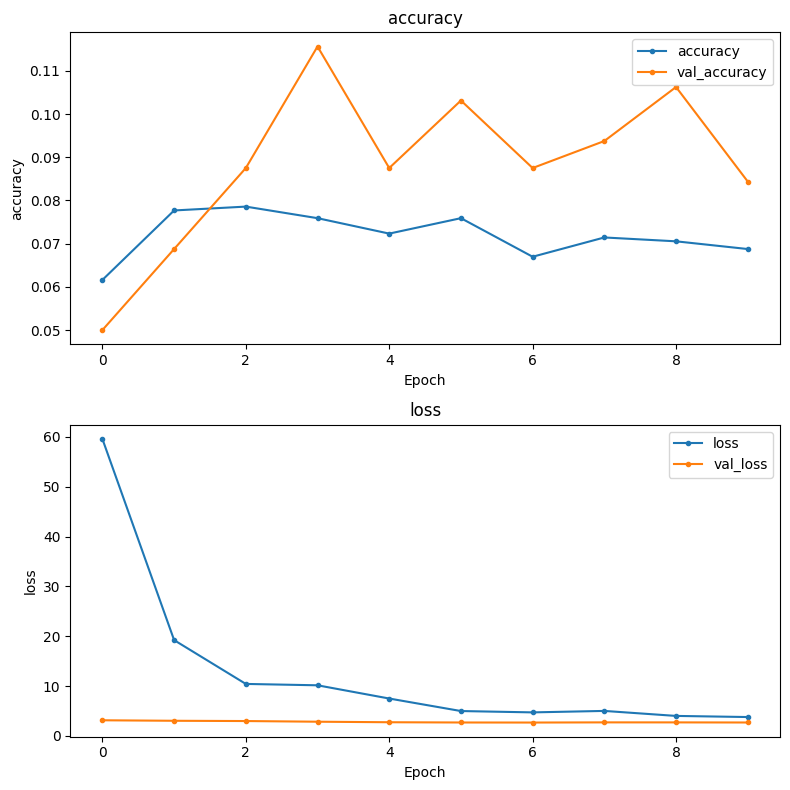


- Evaluating Network...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.09      0.85      0.16        66
           1       0.00      0.00      0.00        61
           2       0.09      0.02      0.03        66
           3       0.12      0.12      0.12        93
           4       0.40      0.03      0.05        75
           5       0.40      0.03      0.05        76
           6       0.12      0.53      0.20        78
           7       0.11      0.05      0.07        81
           8       0.00      0.00      0.00        84
           9       0.00      0.00      0.00        76
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00        83
          12       0.00      0.00      0.00        82
          13       0.00      0.00      0.00        66
        

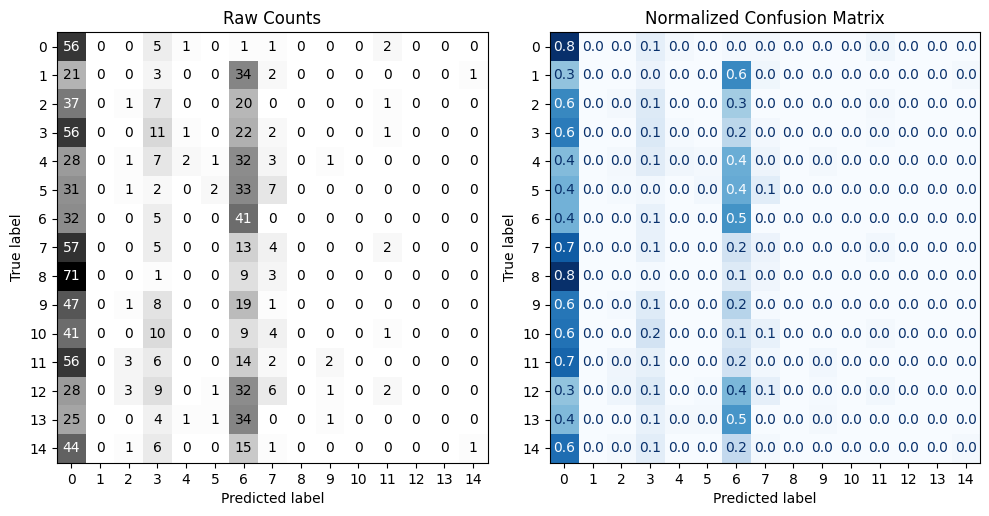


- Evaluating Training Data:
15/35 [===========>..................] - ETA: 0s - loss: 2.6682 - accuracy: 0.0979

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


35/35 [==============================] - 0s 7ms/step - loss: 2.6677 - accuracy: 0.1054
{'loss': 2.66774845123291, 'accuracy': 0.10535714030265808}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.07      0.88      0.14         8
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        10
           3       0.10      0.12      0.11         8
           4       0.00      0.00      0.00         9
           5       1.00      0.10      0.18        10
           6       0.16      0.67      0.26         9
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00        11
           9       1.00      0.07      0.12        15
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         9
          14

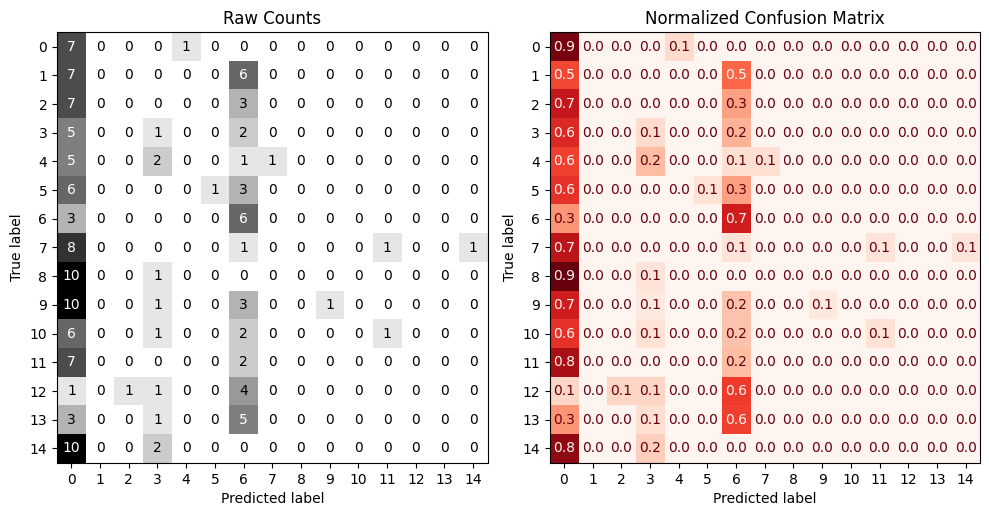


- Evaluating Test Data:
1/5 [=====>........................] - ETA: 0s - loss: 2.7290 - accuracy: 0.1250

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5/5 [==============================] - 0s 54ms/step - loss: 2.7156 - accuracy: 0.1060
{'loss': 2.7156152725219727, 'accuracy': 0.10596026480197906}


In [37]:
evaluate_classification_network(model,
                                    X_train=train_dataset,
                                    X_test=test_dataset,
                                    history=history, history_figsize=(8, 8),
                                    figsize=(10,10),
                                    values_format=".1f",
                                    colorbar=False)

In [38]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.6 MB/s eta 0:00:00


In [39]:
# import for hyparameter tuning
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from keras_tuner import Hyperband, HyperModel, HyperParameters as hp

In [41]:
# we hyper tune our model using build model function
def build_model_tune(hp):
  model = Sequential()
  model.add(Rescaling(1.0 / 255, input_shape=input_shape))
  # adding augmented model
  model.add(augmented_dataset)
  # Setting hp params and saving as var so they can be used at >1 layer
  n_filters = hp.Int('filters_1',min_value=16, max_value=64, step=16)
  pool_strides = hp.Choice('pool_strides',[1,2])

  model.add(Conv2D(n_filters,
                          # Test using larger kernel size (in first Conv layer ONLY)
                          kernel_size= hp.Choice('kernel_size_1',[3,5]),
                          padding='same')
            )
  model.add(MaxPooling2D(2, strides=pool_strides))
  for i in range(hp.Int('n_conv_layers',min_value=1, max_value=3)):
      # Double the number of filters vs. previous layer
      n_filters = n_filters * 2
      model.add(Conv2D(n_filters, kernel_size=3, padding='same'))
      model.add(MaxPooling2D(2, strides=pool_strides))

      model.add(Dropout(hp.Float('dropout_rate',min_value=0.1, max_value=0.5, step=.1)))
  # Final layer
  model.add(Flatten())
  model.add(Dense(n_filters, activation="relu"))
  # Test various dropout strengths
  model.add(Dropout(hp.Float('dropout_rate_dense',min_value=0, max_value=0.5, step=.1)))
  model.add(Dense(image_class_num, activation="softmax"))
  model.compile(
      optimizer="adam",
      loss='categorical_crossentropy',
      metrics=["accuracy"],
  )

  return model

In [42]:
# Define the tuner
tuner_hb = kt.Hyperband(build_model_tune, objective='val_accuracy',
                        max_epochs=15, overwrite=True, seed=321,)
# Preivew search summary
tuner_hb.search_space_summary()

Search space summary
Default search space size: 6
filters_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
pool_strides (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2], 'ordered': True}
kernel_size_1 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
n_conv_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dropout_rate_dense (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}


In [43]:
# model search
tuner_hb.search(train_dataset, validation_data=val_dataset, epochs=25)
# Obtain summary of results
tuner_hb.results_summary()

Trial 27 Complete [00h 00m 13s]

Best val_accuracy So Far: 0.10625000298023224
Total elapsed time: 00h 09m 52s
Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0004 summary
Hyperparameters:
filters_1: 64
pool_strides: 2
kernel_size_1: 3
n_conv_layers: 3
dropout_rate: 0.30000000000000004
dropout_rate_dense: 0.4
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.10625000298023224

Trial 0016 summary
Hyperparameters:
filters_1: 32
pool_strides: 2
kernel_size_1: 5
n_conv_layers: 2
dropout_rate: 0.30000000000000004
dropout_rate_dense: 0.0
tuner/epochs: 15
tuner/initial_epoch: 5
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.10625000298023224

Trial 0013 summary
Hyperparameters:
filters_1: 32
pool_strides: 2
kernel_size_1: 5
n_conv_layers: 2
dropout_rate: 0.30000000000000004
dropout_rate_dense: 0.0
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/

Best Params: 
 {'filters_1': 32, 'pool_strides': 2, 'kernel_size_1': 5, 'n_conv_layers': 2, 'dropout_rate': 0.30000000000000004, 'dropout_rate_dense': 0.0, 'tuner/epochs': 15, 'tuner/initial_epoch': 5, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}



- Evaluating Network...


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        71
           1       0.90      1.00      0.95        63
           2       0.90      0.95      0.93        66
           3       0.97      0.99      0.98        91
           4       0.99      1.00      0.99        75
           5       1.00      0.96      0.98        81
           6       1.00      0.97      0.99        78
           7       1.00      0.97      0.99        76
           8       0.99      0.95      0.97        78
           9       0.95      0.82      0.88        74
          10       0.87      0.95      0.91        64
          11       0.99      0.99      0.99        82
          12       0.88      1.00      0.94        81
          13       1.00      0.96      0.98        72
        

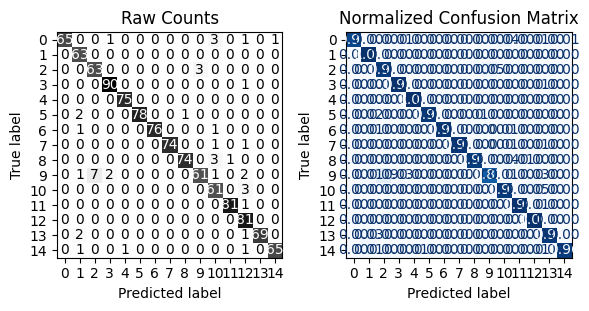


- Evaluating Training Data:
35/35 [==============================] - 1s 10ms/step - loss: 0.1657 - accuracy: 0.9607
{'loss': 0.1657104343175888, 'accuracy': 0.9607142806053162}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.36      0.44        11
           1       0.40      0.33      0.36         6
           2       0.27      0.43      0.33         7
           3       0.26      0.83      0.40         6
           4       0.58      0.64      0.61        11
           5       0.50      0.67      0.57         3
           6       0.50      0.50      0.50         4
           7       0.64      0.54      0.58        13
           8       0.43      0.30      0.35        10
           9       0.12      0.12      0.12         8
          10       0.53      0.47      0.50       

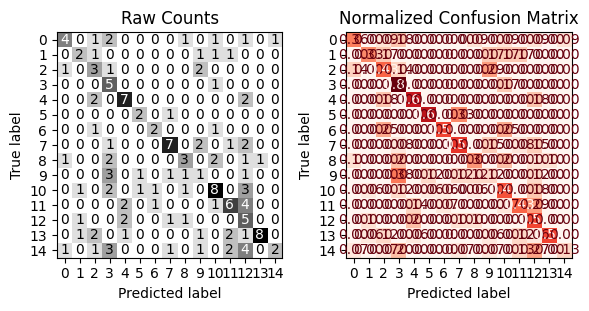


- Evaluating Test Data:
5/5 [==============================] - 0s 12ms/step - loss: 3.5421 - accuracy: 0.4305
{'loss': 3.542062997817993, 'accuracy': 0.430463582277298}


In [ ]:
# Print the results for beset paramters
print(f"Best Params: \n {tuner_hb.get_best_hyperparameters()[0].values}" )
# Define the best model
best_model = tuner_hb.get_best_models()[0]
# Evalute the best model with the custom evaluation function
evaluate_classification_network(best_model, X_train=train_dataset, X_test=test_dataset, history_figsize=(10,10), history=None);